# __Adjustment Factor for Stock Splits and Dividends__

<br>

It is necessary to adjust the historical prices for stock splits and dividends. See [here](https://whr.tn/2TAfMS4) for more information on this topic.

<br>

The important thing to see is how to mechanically do this. 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [17]:
inFile1 = "WaterStocks.csv"
raw = pd.read_csv(inFile1, parse_dates=True, index_col=1)
raw.head()

,PERMNO,TICKER,COMNAM,PERMCO,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,SHROUT,OPENPRC,NUMTRD,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn
date,,,,,,,,,,,,,,,,,,,,
1997-01-02,26463,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.000,30.0,29.25,1216,0.000000,29.000,30.0,3011,29.250,6.0,0.000000,-0.007358,-0.007403,0.001325,0.001294,-0.005036
1997-01-03,26463,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.250,30.0,29.25,1850,0.000000,29.250,30.0,3011,30.000,5.0,0.000000,0.013491,0.013451,0.012477,0.012428,0.014952
1997-01-06,26463,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.250,30.0,29.25,3226,0.000000,29.250,30.0,3011,29.250,8.0,0.000000,0.000697,0.000680,0.005099,0.005086,-0.000508
1997-01-07,26463,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0,29.75,2233,0.017094,29.125,30.0,3011,29.125,5.0,0.017094,0.007357,0.007305,0.007338,0.007329,0.007463
1997-01-08,26463,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0,30.00,2252,0.008403,29.125,30.0,3011,29.125,6.0,0.008403,-0.003754,-0.003971,0.004376,0.004304,-0.006399


In [18]:
data = raw[['PERMNO', 'COMNAM', 'PRC']]
data.PRC = np.abs(data.PRC.values)
data.head()

,PERMNO,COMNAM,PRC
date,,,
1997-01-02,26463,CONNECTICUT WATER SERVICE INC,29.25
1997-01-03,26463,CONNECTICUT WATER SERVICE INC,29.25
1997-01-06,26463,CONNECTICUT WATER SERVICE INC,29.25
1997-01-07,26463,CONNECTICUT WATER SERVICE INC,29.75
1997-01-08,26463,CONNECTICUT WATER SERVICE INC,30.00


In [19]:
data.tail()

,PERMNO,COMNAM,PRC
date,,,
2008-12-24,71475,AMERICAN STATES WATER CO,32.65
2008-12-26,71475,AMERICAN STATES WATER CO,32.71
2008-12-29,71475,AMERICAN STATES WATER CO,30.78
2008-12-30,71475,AMERICAN STATES WATER CO,30.30
2008-12-31,71475,AMERICAN STATES WATER CO,32.98


In [20]:
inFile2 = "CFACPR.csv"
fac = pd.read_csv(inFile2, parse_dates=True, index_col=1)
fac = fac[['PERMNO', 'CFACPR']]
fac.head()

,PERMNO,CFACPR
date,,
1997-01-02,26463,2.25
1997-01-03,26463,2.25
1997-01-06,26463,2.25
1997-01-07,26463,2.25
1997-01-08,26463,2.25


In [21]:
fac.tail()

,PERMNO,CFACPR
date,,
2008-12-24,71475,2.0
2008-12-26,71475,2.0
2008-12-29,71475,2.0
2008-12-30,71475,2.0
2008-12-31,71475,2.0


If we plot prices without adjustment we can see the "jumps" due to stock splits and dividends. Let's look at PERMNO 26463

In [22]:
data = data[data.PERMNO == 26463]
data.head()

,PERMNO,COMNAM,PRC
date,,,
1997-01-02,26463,CONNECTICUT WATER SERVICE INC,29.25
1997-01-03,26463,CONNECTICUT WATER SERVICE INC,29.25
1997-01-06,26463,CONNECTICUT WATER SERVICE INC,29.25
1997-01-07,26463,CONNECTICUT WATER SERVICE INC,29.75
1997-01-08,26463,CONNECTICUT WATER SERVICE INC,30.00


In [23]:
data.tail()

,PERMNO,COMNAM,PRC
date,,,
2008-12-24,26463,CONNECTICUT WATER SERVICE INC,23.00
2008-12-26,26463,CONNECTICUT WATER SERVICE INC,23.17
2008-12-29,26463,CONNECTICUT WATER SERVICE INC,22.89
2008-12-30,26463,CONNECTICUT WATER SERVICE INC,22.93
2008-12-31,26463,CONNECTICUT WATER SERVICE INC,23.61


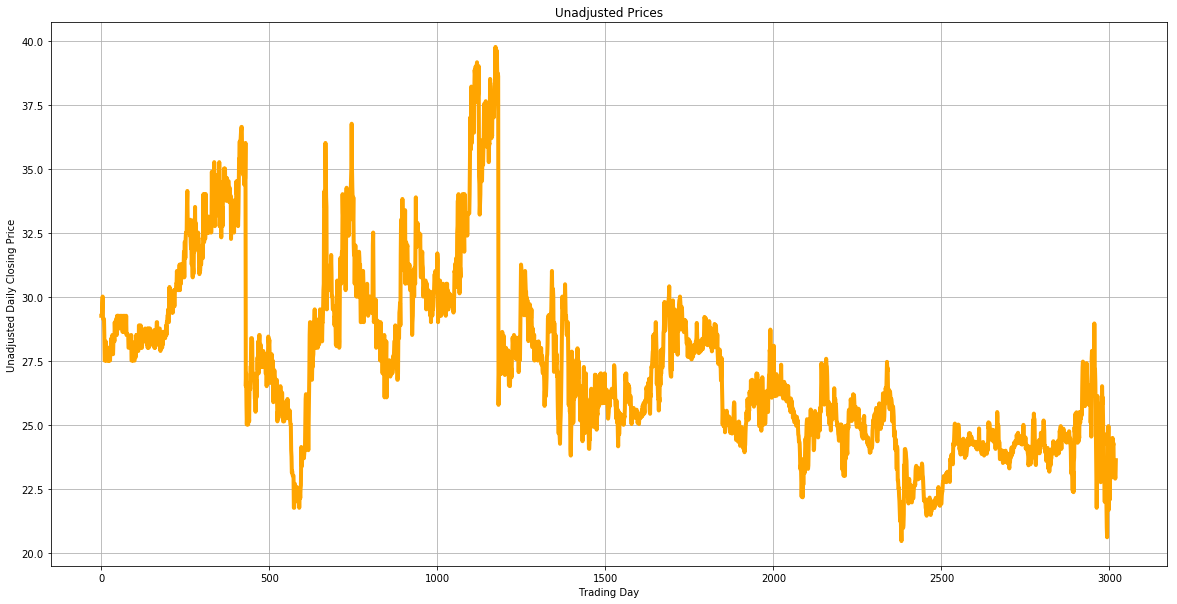

In [24]:
## plot the simulated returns path
fig, ax = plt.subplots()
#ax.plot_date(r, linestyle='--')
ax.grid(True)
plt.title("Unadjusted Prices")
plt.ylabel("Unadjusted Daily Closing Price")
plt.xlabel("Trading Day")
plt.plot(data.PRC.values, linewidth=4, color="orange")
plt.show()

You can see how on the stock split days and ex-dividend days the price seems to "jump"

## Ajusting Prices for Stock Splits and Dividends with the Variable CFACPR

In [25]:
fac = fac[fac.PERMNO == 26463]
fac.head()

,PERMNO,CFACPR
date,,
1997-01-02,26463,2.25
1997-01-03,26463,2.25
1997-01-06,26463,2.25
1997-01-07,26463,2.25
1997-01-08,26463,2.25


In [26]:
fac.tail()

,PERMNO,CFACPR
date,,
2008-12-24,26463,1.0
2008-12-26,26463,1.0
2008-12-29,26463,1.0
2008-12-30,26463,1.0
2008-12-31,26463,1.0


In [27]:
adjPrc = data.PRC.values / fac.CFACPR.values

In [28]:
adjPrc[:50]

array([13.        , 13.        , 13.        , 13.22222222, 13.33333333,
       12.94444444, 12.94444444, 12.94444444, 12.94444444, 12.66666667,
       12.22222222, 12.22222222, 12.22222222, 12.55555556, 12.22222222,
       12.22222222, 12.22222222, 12.22222222, 12.22222222, 12.22222222,
       12.44444444, 12.22222222, 12.44444444, 12.22222222, 12.44444444,
       12.44444444, 12.22222222, 12.44444444, 12.44444444, 12.44444444,
       12.61111111, 12.47222222, 12.33333333, 12.66666667, 12.33333333,
       12.33333333, 12.55555556, 12.66666667, 12.66666667, 12.55555556,
       12.88888889, 12.72222222, 12.83333333, 12.66666667, 12.94444444,
       12.66666667, 12.66666667, 13.        , 12.77777778, 13.        ])

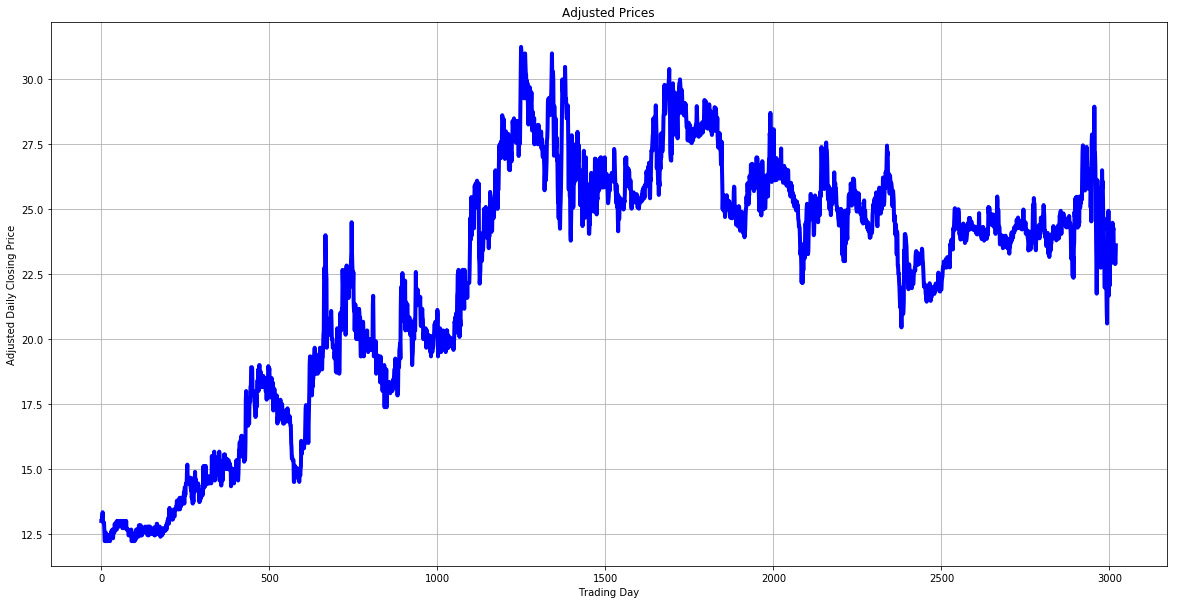

In [29]:
## plot the simulated returns path
fig, ax = plt.subplots()
#ax.plot_date(r, linestyle='--')
ax.grid(True)
plt.title("Adjusted Prices")
plt.ylabel("Adjusted Daily Closing Price")
plt.xlabel("Trading Day")
plt.plot(adjPrc, linewidth=4, color="blue")
plt.show()

We can see that the time series is now adjust backwards in time for splits and dividends. This will fix the problems you are having when plotting your estimated residuals for pairs. 

## Code to Create New Adjust Prices File

In [55]:
permnos = list(set(raw.PERMNO))
permnos.sort()
permnos

[26463, 52898, 71475]

In [84]:
## reread the original data
inFile1 = "WaterStocks.csv"
raw = pd.read_csv(inFile1, parse_dates=True, index_col=1)
data = raw[['PERMNO', 'COMNAM', 'PRC']]
data.PRC = np.abs(data.PRC.values)

## reread the adjustment data
inFile2 = "CFACPR.csv"
fac = pd.read_csv(inFile2, parse_dates=True, index_col=1)
fac = fac[['PERMNO', 'CFACPR']]

## get list of permnos
permnos = list(set(data.PERMNO))
permnos.sort()
permnos

## set up temporary dictionary
adjDat = dict()

## loop and make adjustments
for permno in permnos:
    print(permno)
    a = data[data.PERMNO == permno]
    b = fac[fac.PERMNO == permno]
    adjDat[permno] = a.PRC.values / b.CFACPR.values
    
df = pd.DataFrame(adjDat)
df.index = a.index

26463
52898
71475


In [86]:
df.head()

,26463,52898,71475
date,,,
1997-01-02,13.000000,4.492811,7.291667
1997-01-03,13.000000,4.665612,7.291667
1997-01-06,13.000000,4.636812,7.333333
1997-01-07,13.222222,4.608011,7.333333
1997-01-08,13.333333,4.636812,7.416667


In [87]:
df.tail()

,26463,52898,71475
date,,,
2008-12-24,23.00,16.064,16.325
2008-12-26,23.17,16.104,16.355
2008-12-29,22.89,16.000,15.390
2008-12-30,22.93,15.200,15.150
2008-12-31,23.61,16.472,16.490


In [89]:
outFile = "WaterStocksAdj.csv"
df.to_csv(outFile)